In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.linspace(-1,2,5)

array([-1.  , -0.25,  0.5 ,  1.25,  2.  ])

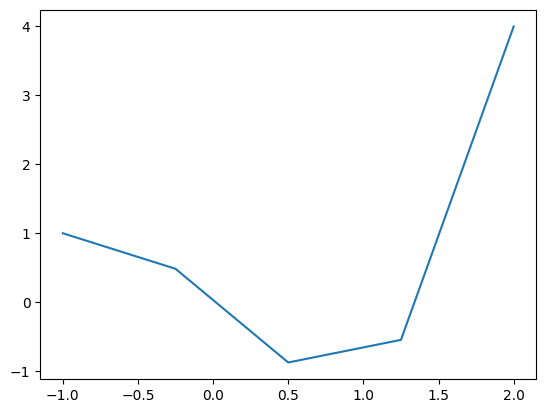

In [7]:
ts = np.linspace(-1, 2, 5) # define where to evaluate
valores = ts**3 - 2*ts # evaluate polynomial
plt.plot( ts, valores, label='evals = 5' ) # plot

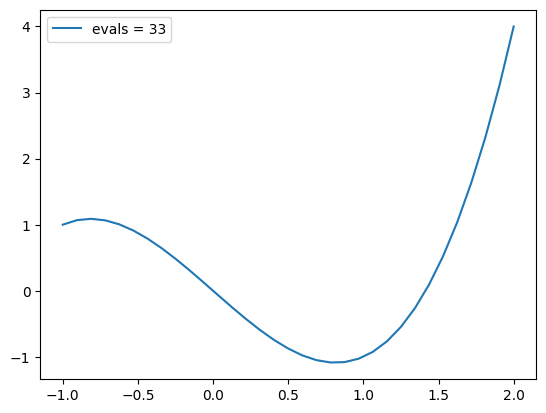

In [8]:
ts = np.linspace(-1, 2, 33) # define where to evaluate
plt.plot( ts, ts**3 - 2*ts, label='evals = 33' ) # evaluate and plot
plt.legend()

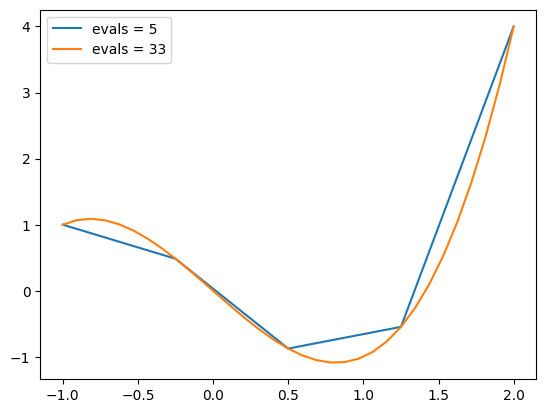

In [15]:
ts = np.linspace(-1, 2, 5) # define where to evaluate
valores = ts**3 - 2*ts # evaluate polynomial
plt.plot( ts, valores, label='evals = 5' ) # plot
ts = np.linspace(-1, 2, 33) # define where to evaluate
plt.plot( ts, ts**3 - 2*ts, label='evals = 33' ) # evaluate and plot
plt.legend()

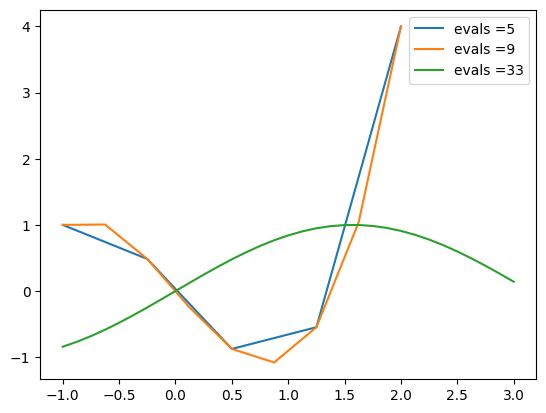

In [18]:
def plotFunction( f, I, evals ):
    a,b = I
    ts = np.linspace(a, b, evals)
    valores = f(ts) # evaluate function
    plt.plot( ts, valores, label='evals ='+str(evals) )

p = lambda t: t**3 -2*t # define how to evaluate the polynom
plotFunction(p, [-1,2], 5) # the graph is a polygon (4 lines)
plotFunction(p, [-1,2], 9) # the graph is a polygon (8 lines)
plotFunction(np.sin, [-1,3], 33) # the graph looks smooth, but is a polygon (32 lines)
plt.legend()

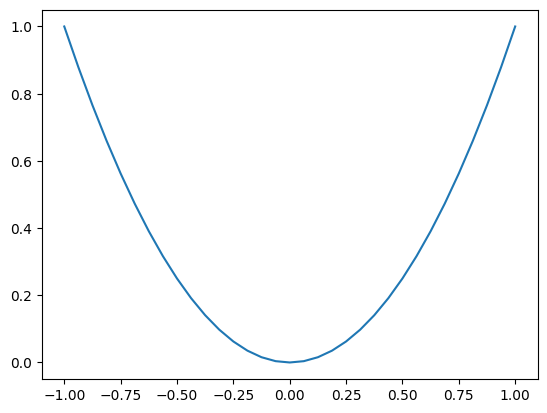

In [45]:
# Evaluo un polinomio con coeficientes a
def evaCan(ts, a):
    nPlus = len(a)
    res = a[0]*np.ones(ts.shape)
    for i in range(1, nPlus):
        res += a[i]*ts**i
    return res

ts = np.linspace(-1,1,33)
valores = evaCan(ts, np.array([0,0,1]))
plt.plot(ts, valores)

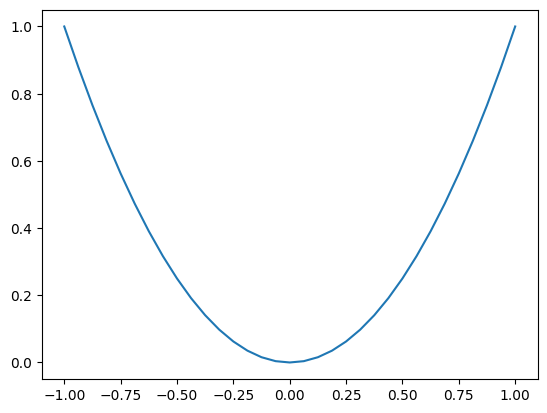

In [44]:
def evaCanNested (ts, a):
    n = len(a) -1
    v = a[-1]*np.ones(ts.shape)
    for i in reversed(range(n)):
        v = a[i] + ts*v
    return v

ts = np.linspace(-1,1, 33)
valores = evaCanNested(ts, np.array([0,0,1]))
plt.plot(ts, valores)

Text(0.5, 1.0, '(x-1)^7 eveCan vs. not eveCanNested')

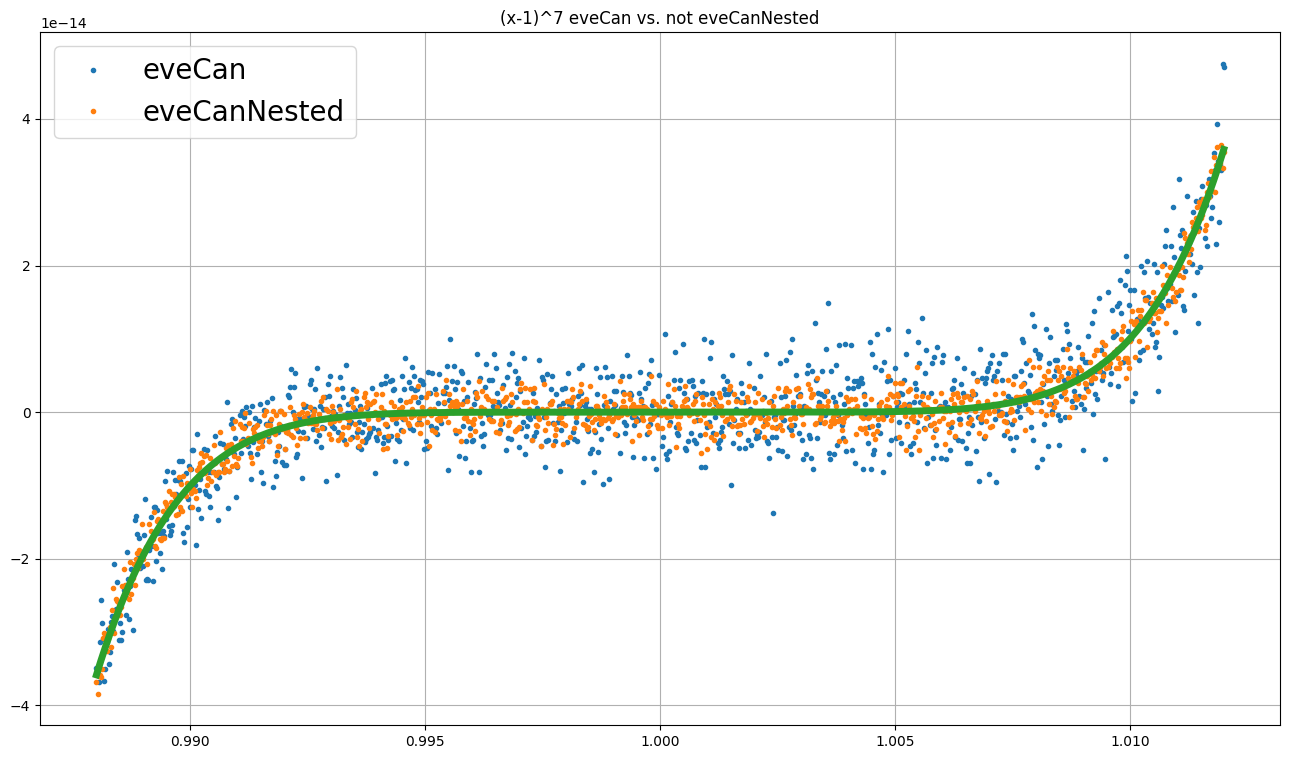

In [61]:

x = np.linspace(0.988, 1.012, 1001)
coeff = np.array(list(reversed([1.0, -7.0, 21., -35., 35., -21., 7., -1.])))
#valores = coeff[0]*x**7 + coeff[1]*x**6 + coeff[2]*x**5 + coeff[3]*x**4 + coeff[4]*x**3 + coeff[5]*x**2 + coeff[6]*x + coeff[7]
valores = evaCan(x, coeff)
valoresN = evaCanNested(x, coeff)

f, ax = plt.subplots()
f.set_figheight(9)
f.set_figwidth(16)
plt.grid()
plt.plot(x, valores, '.')
plt.plot(x, valoresN, '.')
plt.plot(x, (x-1.)**7, linewidth=5)
plt.legend(['eveCan', 'eveCanNested'], fontsize=20)
plt.title('(x-1)^7 eveCan vs. not eveCanNested')


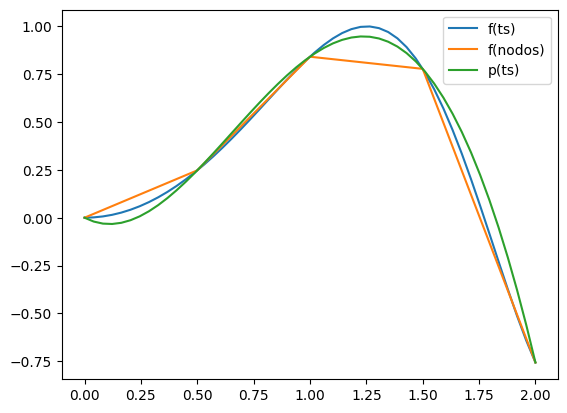

In [81]:
import scipy.linalg as LA

def getCoefVandermonde(xs, fs):
    
    nPlus = len(xs)
    # Python te deja expandir tu matriz, una columna para cada potencia
    Vs = xs[:, np.newaxis]**np.arange(nPlus) 
    return LA.solve(Vs, fs)




f = lambda t: np.sin(t**2)
nPlus = 5
I = [0,2]
evals = 50
nodos = np.linspace(I[0], I[1], nPlus) # nodos para interpolación

ts = np.linspace(I[0], I[1], evals) # nodos para evaluación

plt.plot(ts, f(ts), label="f(ts)")
plt.plot(nodos, f(nodos), label="f(nodos)")

coe = getCoefVandermonde(nodos, f(nodos))

pts = evaCanNested(ts, coe)
plt.plot(ts, pts, label="p(ts)")

plt.legend()

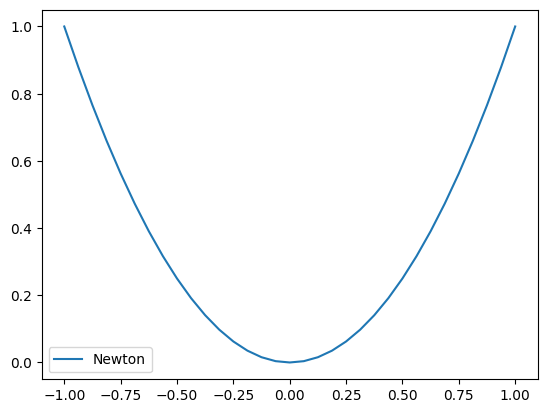

In [88]:
# Evaluo un polinomio con coeficientes a
def evaNewton(t, c, nodos):
    n = len(c)-1
    prod = np.ones(ts.shape)
    res = c[0]*prod

    for i in range(n):
        prod *= (t-nodos[i])
        res += c[i+1]*prod
    return res




ts = np.linspace(-1,1, 33)
valoresN = evaNewton(ts, np.array([0,0,1]), np.array([0,0,0]))
plt.plot(ts, valoresN, label='Newton')
plt.legend()


In [95]:
def getCoefNewton(xs, fs):
    nPlus = len(xs)
    mat = np.zeros((nPlus,nPlus))
    mat[:, 0] = 1

    for i in range(nPlus):
        prod = 1
        for j in range(1, i+1):
            prod *= xs[i]-xs[j-1]
            mat[i,j] = prod
    print(mat)
    return LA.solve(mat, fs)

[[1.     0.     0.     0.     0.    ]
 [1.     0.5    0.     0.     0.    ]
 [1.     0.5    0.25   0.     0.    ]
 [1.     0.5    0.25   0.125  0.    ]
 [1.     0.5    0.25   0.125  0.0625]]


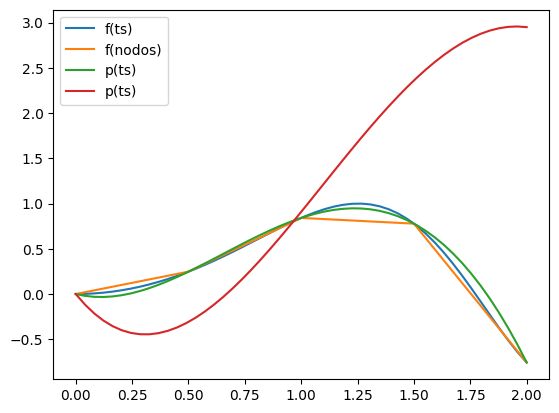

In [100]:
    
f = lambda t: np.sin(t**2)
nPlus = 5
I = [0,2]
evals = 50
nodos = np.linspace(I[0], I[1], nPlus) # nodos para interpolación

ts = np.linspace(I[0], I[1], evals) # nodos para evaluación

plt.plot(ts, f(ts), label="f(ts)")
plt.plot(nodos, f(nodos), label="f(nodos)")

coe = getCoefVandermonde(nodos, f(nodos))
coeN = getCoefNewton(nodos, f(nodos))

pts = evaCanNested(ts, coe)
ptsN = evaNewton(ts, coe, nodos)
plt.plot(ts, pts, label="p(ts)")
plt.plot(ts, ptsN, label="p(ts)")

plt.legend()